# hw2: Решающие деревья

*Спасибо великому курсу великого Евгения Соколова*

СТУДЕНТ: Бугренков Владимир
Группа: М8О-311Б-23


In [69]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import Colormap, ListedColormap
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style='whitegrid')

import warnings
warnings.filterwarnings('ignore')

# 1. Решающие деревья. Визуализация.

В этой части мы рассмотрим два простых двумерных датасета сделанных с помощью `make_moons`, `make_circles` и посмотрим как ведет себя разделяющая поверхность в зависимости от различных гиперпараметров.

In [58]:
from sklearn.datasets import make_moons, make_circles, make_classification
datasets = [
    make_circles(noise=0.2, factor=0.5, random_state=42),
    make_moons(noise=0.2, random_state=42),
    make_classification(n_classes=3, n_clusters_per_class=1, n_features=2, class_sep=.8, random_state=3,
                        n_redundant=0, )
]

In [59]:
palette = sns.color_palette("magma",n_colors=3)
cmap = ListedColormap(palette)

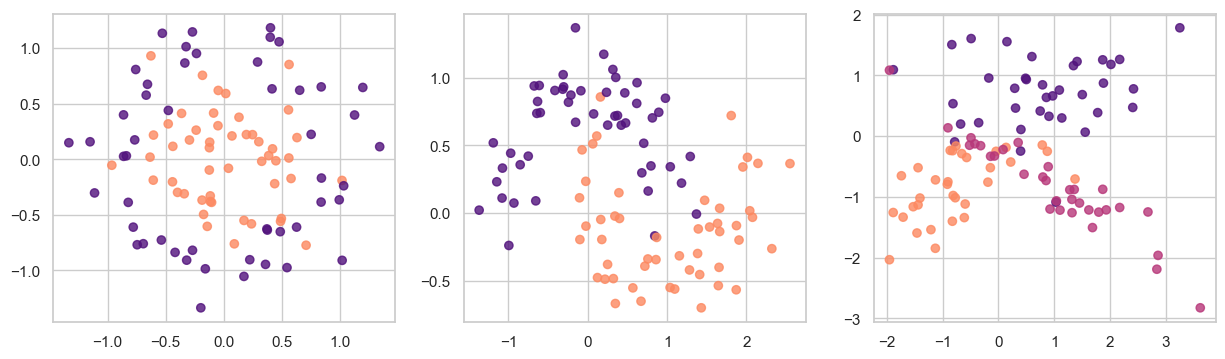

In [60]:
plt.figure(figsize=(15, 4))
for i, (x, y) in enumerate(datasets):
    plt.subplot(1, 3, i + 1)
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap, alpha=.8)

__Задание 1. (1 балл)__

Для каждого датасета обучите решающее дерево с параметрами по умолчанию, предварительно разбив выборку на обучающую и тестовую. Постройте разделящие поверхности (для этого воспользуйтесь функцией `plot_surface`, пример ниже). Посчитайте accuracy на обучающей и тестовой выборках. Сильно ли деревья переобучились?

In [61]:
def plot_surface(clf, X, y):
    plot_step = 0.01
    palette = sns.color_palette("magma",n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=.7,
                edgecolors=np.array(palette)[y], linewidths=2)

датасетик 1: точность train = 1.0000, точность test = 0.7333
датасетик 2: точность train = 1.0000, точность test = 0.8667
датасетик 3: точность train = 1.0000, точность test = 0.8333


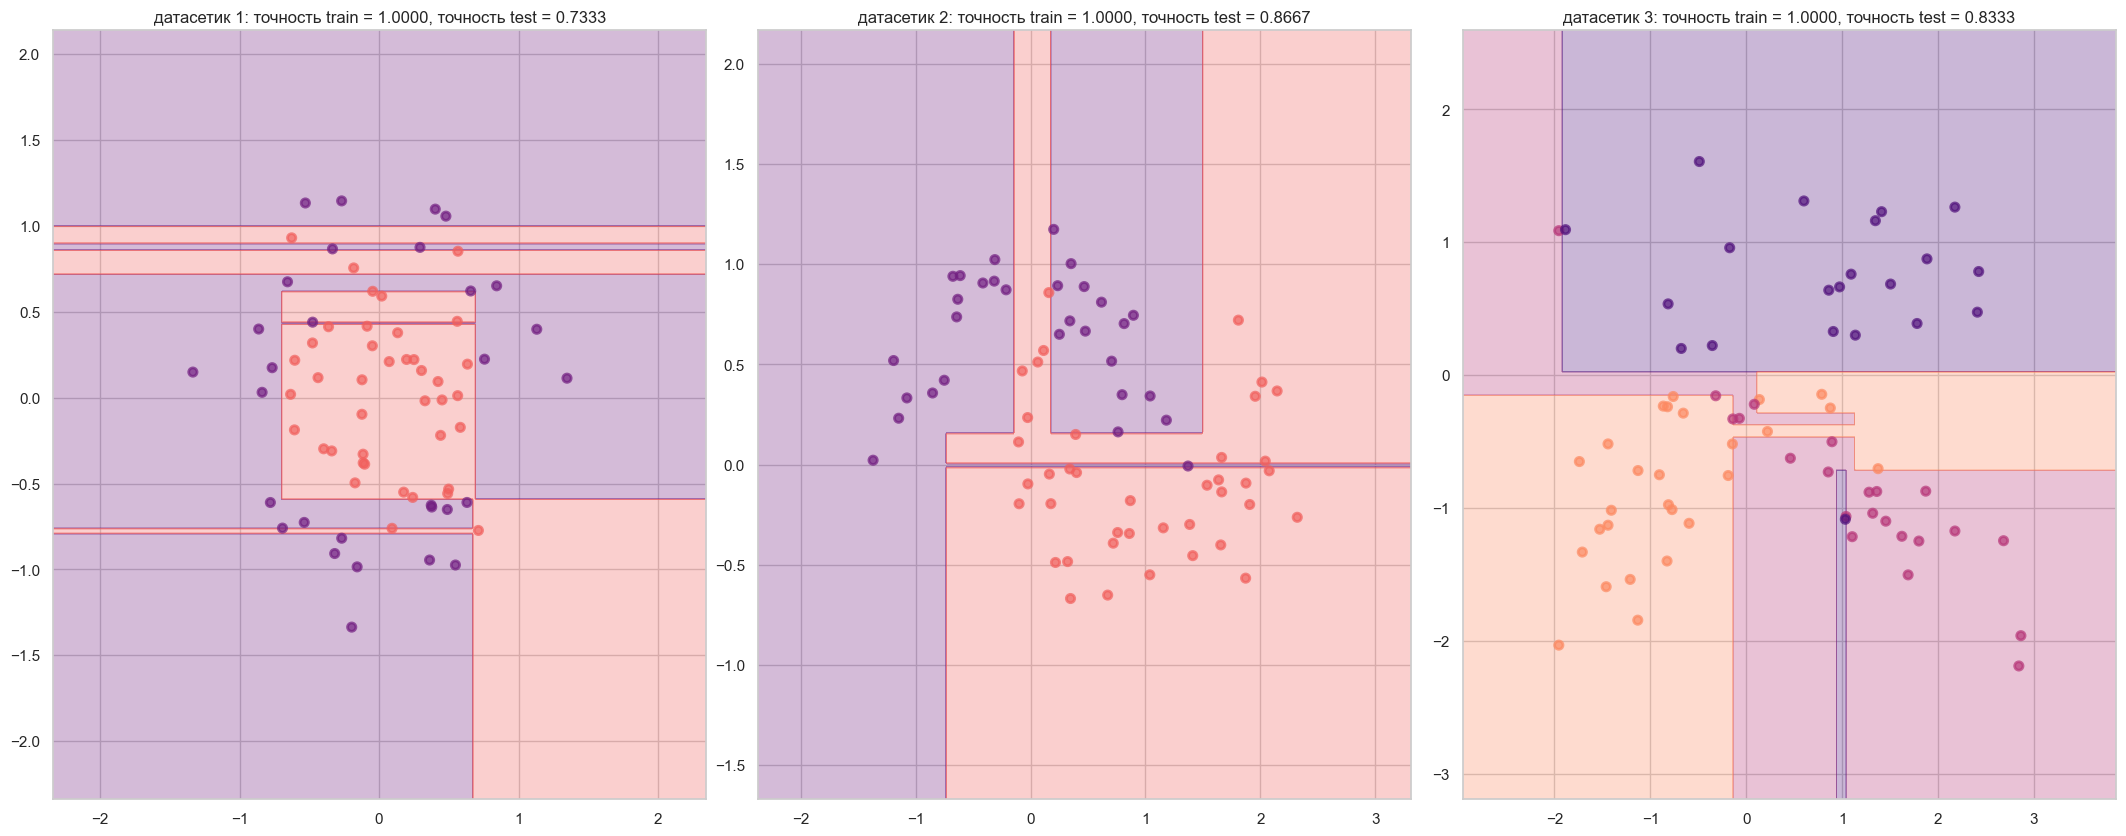

In [62]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

plt.figure(figsize=(22, 9))

for i in range(len(datasets)):
    X, y = datasets[i]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    clf = DecisionTreeClassifier(random_state=42)
    clf.fit(X_train, y_train)
    
    y_pred_train = clf.predict(X_train)
    train_acc = accuracy_score(y_train, y_pred_train)
    
    y_pred_test = clf.predict(X_test)
    test_acc = accuracy_score(y_test, y_pred_test)
    
    plt.subplot(1, 3, i + 1)
    plot_surface(clf, X_train, y_train) 
    
    t_str = f"датасетик {i+1}: точность train = {train_acc:.4f}, точность test = {test_acc:.4f}"
    plt.title(t_str)
    
    print(f"датасетик {i+1}: точность train = {train_acc:.4f}, точность test = {test_acc:.4f}")

plt.show()


In [63]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ - красивеньктй, мой код вместо примера

__Ответ:__
деревья с дефолтными параметрами люто оверфитятся на train accuracy почти единица 

а на тесте качество проседает в ноль особенно на замороченных датасетах типа circles и moons


__Задание 2. (1.5 балла)__

Попробуйте перебрать несколько параметров для регуляризации (напр. `max_depth`, `min_samples_leaf`). Для каждого набора гиперпараметров постройте разделяющую поверхность, выведите обучающую и тестовую ошибки. Можно делать кросс-валидацию или просто разбиение на трейн и тест, главное делайте каждый раз одинаковое разбиение, чтобы можно было корректно сравнивать (помните же, что итоговое дерево сильно зависит от небольшого изменения обучающей выборки?). Проследите как меняется разделяющая поверхность и обобщающая способность. Почему так происходит, одинаково ли изменение для разных датасетов?

датасетик 1 (depth=1): точность train = 0.7286, точность test = 0.4667
датасетик 2 (depth=1): точность train = 0.8429, точность test = 0.8000
датасетик 3 (depth=1): точность train = 0.6714, точность test = 0.6000
датасетик 1 (depth=3): точность train = 0.8857, точность test = 0.7333
датасетик 2 (depth=3): точность train = 0.9143, точность test = 0.9333
датасетик 3 (depth=3): точность train = 0.9429, точность test = 0.8667
датасетик 1 (depth=5): точность train = 0.9714, точность test = 0.7667
датасетик 2 (depth=5): точность train = 1.0000, точность test = 0.8667
датасетик 3 (depth=5): точность train = 0.9714, точность test = 0.8000
датасетик 1 (depth=None): точность train = 1.0000, точность test = 0.7333
датасетик 2 (depth=None): точность train = 1.0000, точность test = 0.8667
датасетик 3 (depth=None): точность train = 1.0000, точность test = 0.8333


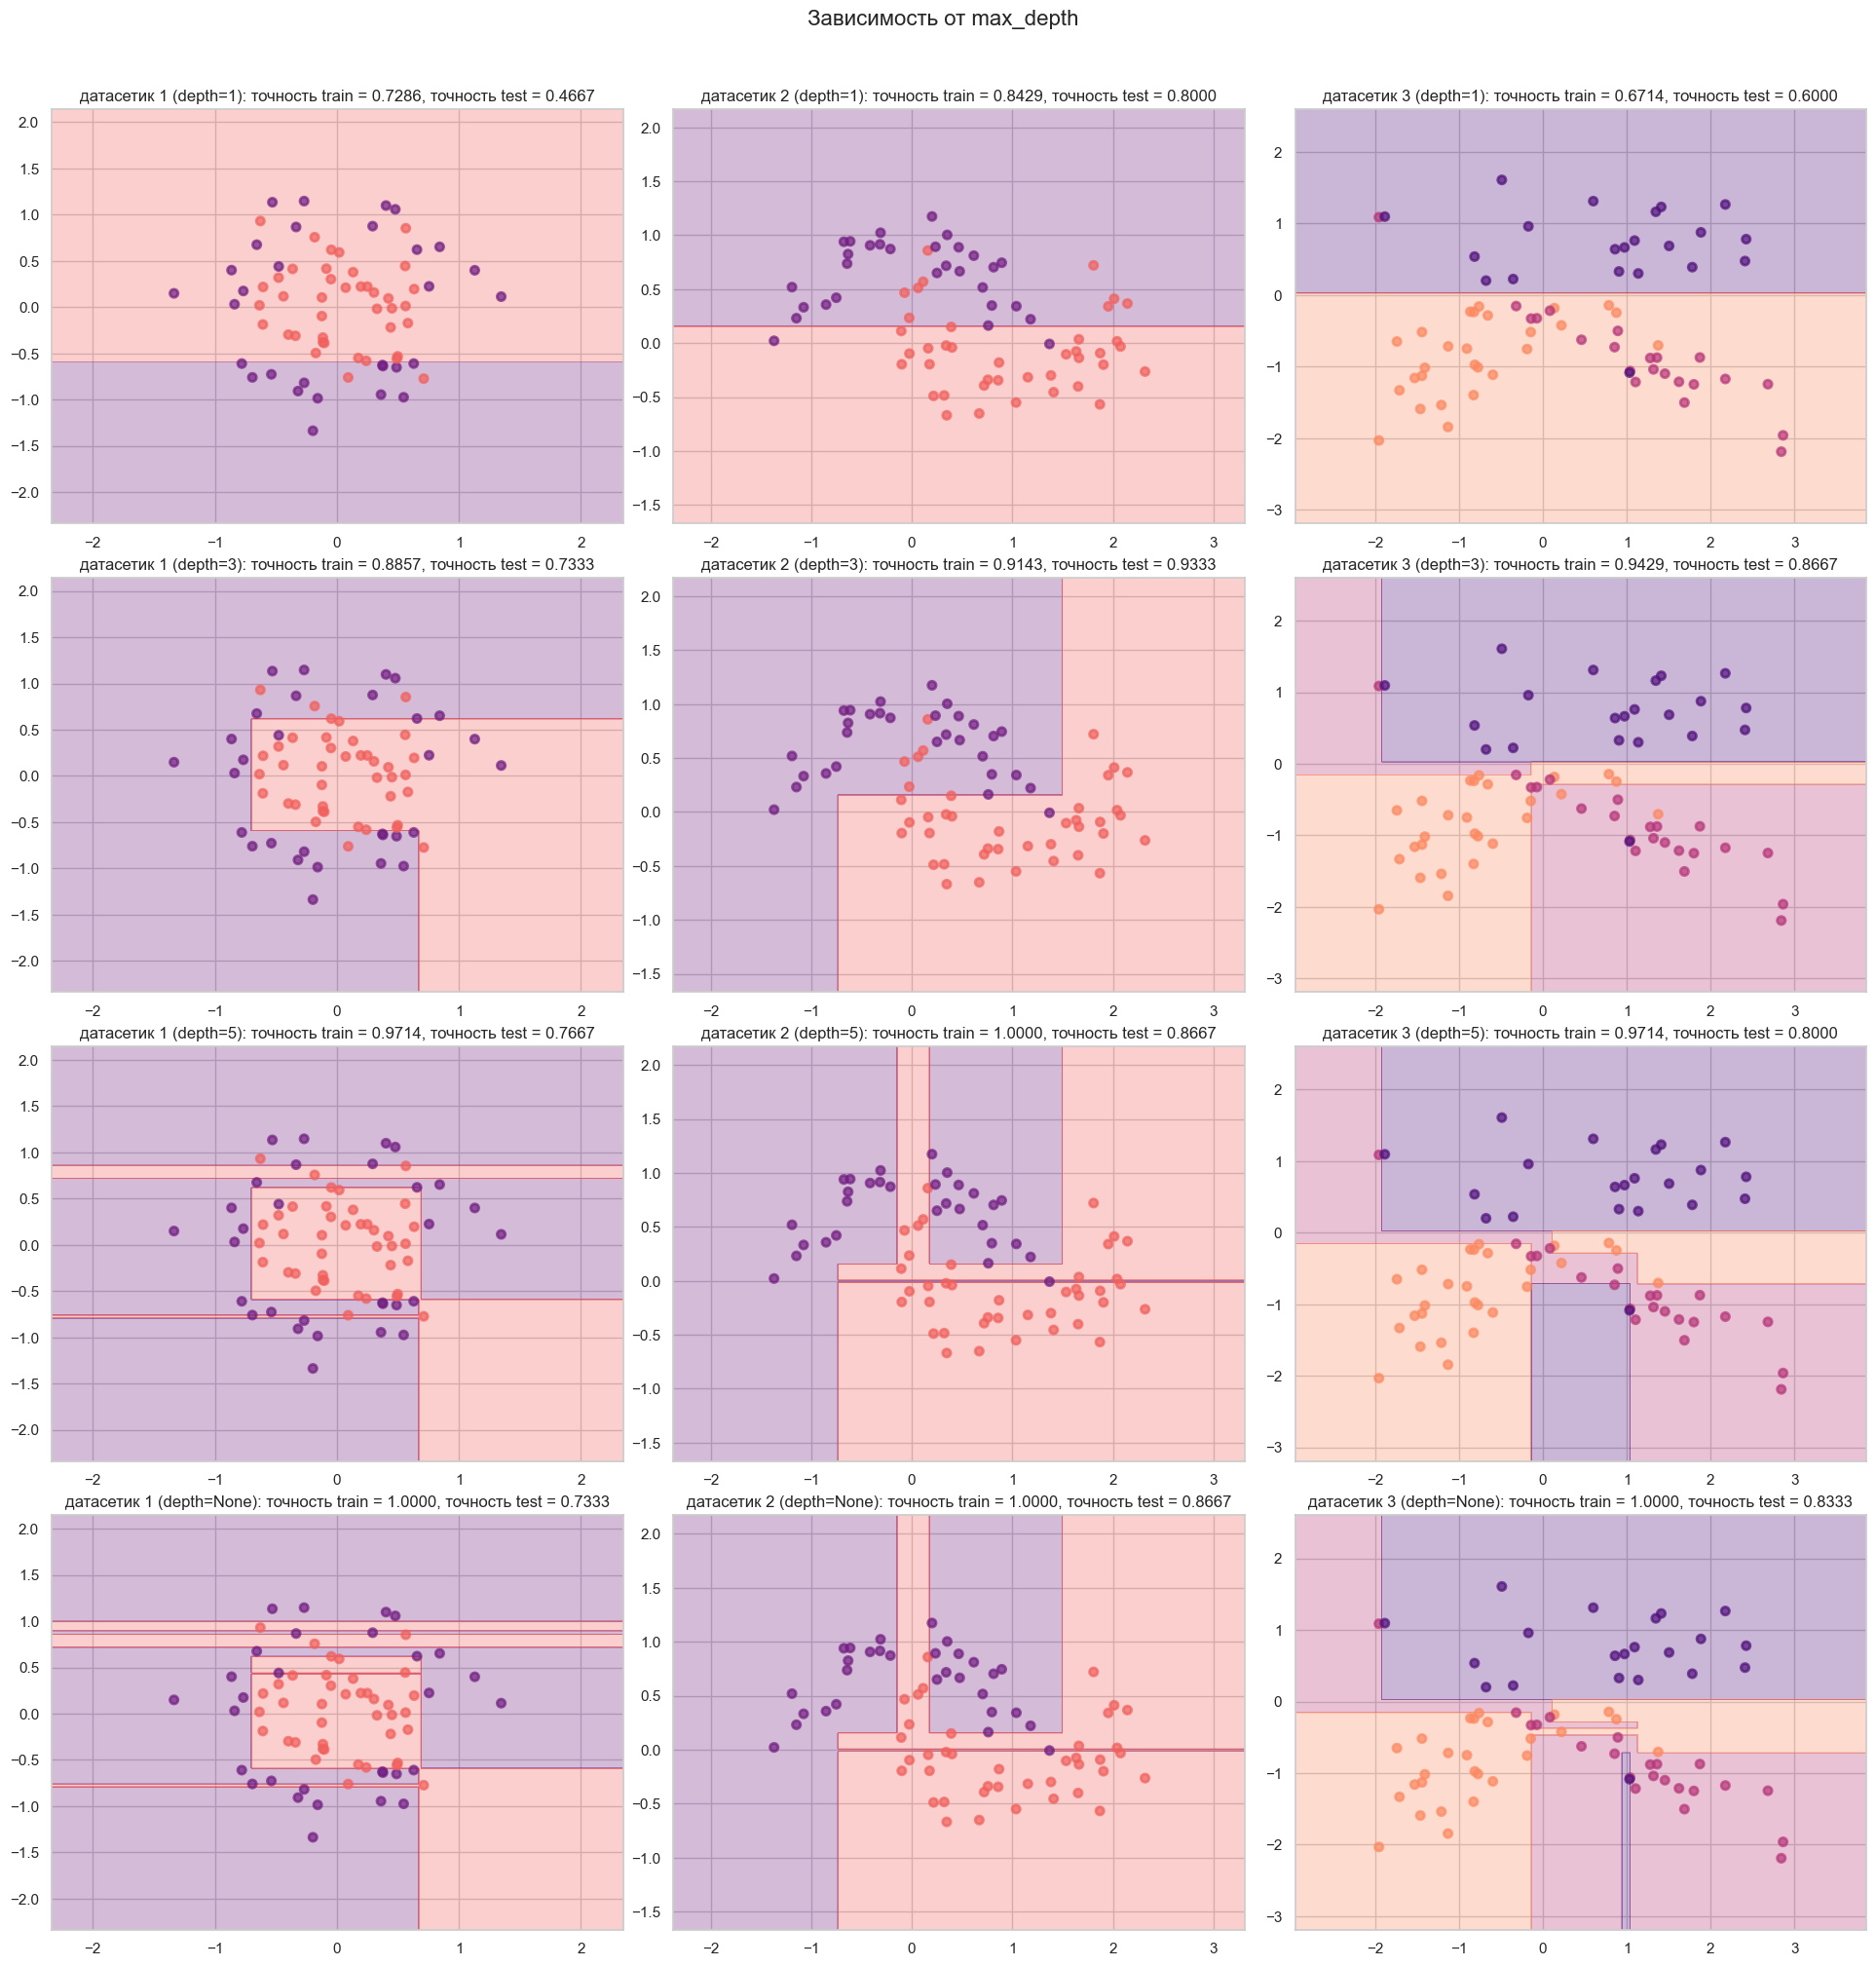

датасетик 1 (leaf=1): точность train = 1.0000, точность test = 0.7333
датасетик 2 (leaf=1): точность train = 1.0000, точность test = 0.8667
датасетик 3 (leaf=1): точность train = 1.0000, точность test = 0.8333
датасетик 1 (leaf=5): точность train = 0.8714, точность test = 0.9000
датасетик 2 (leaf=5): точность train = 0.9571, точность test = 0.7333
датасетик 3 (leaf=5): точность train = 0.9000, точность test = 0.7000
датасетик 1 (leaf=20): точность train = 0.6857, точность test = 0.7333
датасетик 2 (leaf=20): точность train = 0.8429, точность test = 0.8000
датасетик 3 (leaf=20): точность train = 0.8857, точность test = 0.7667


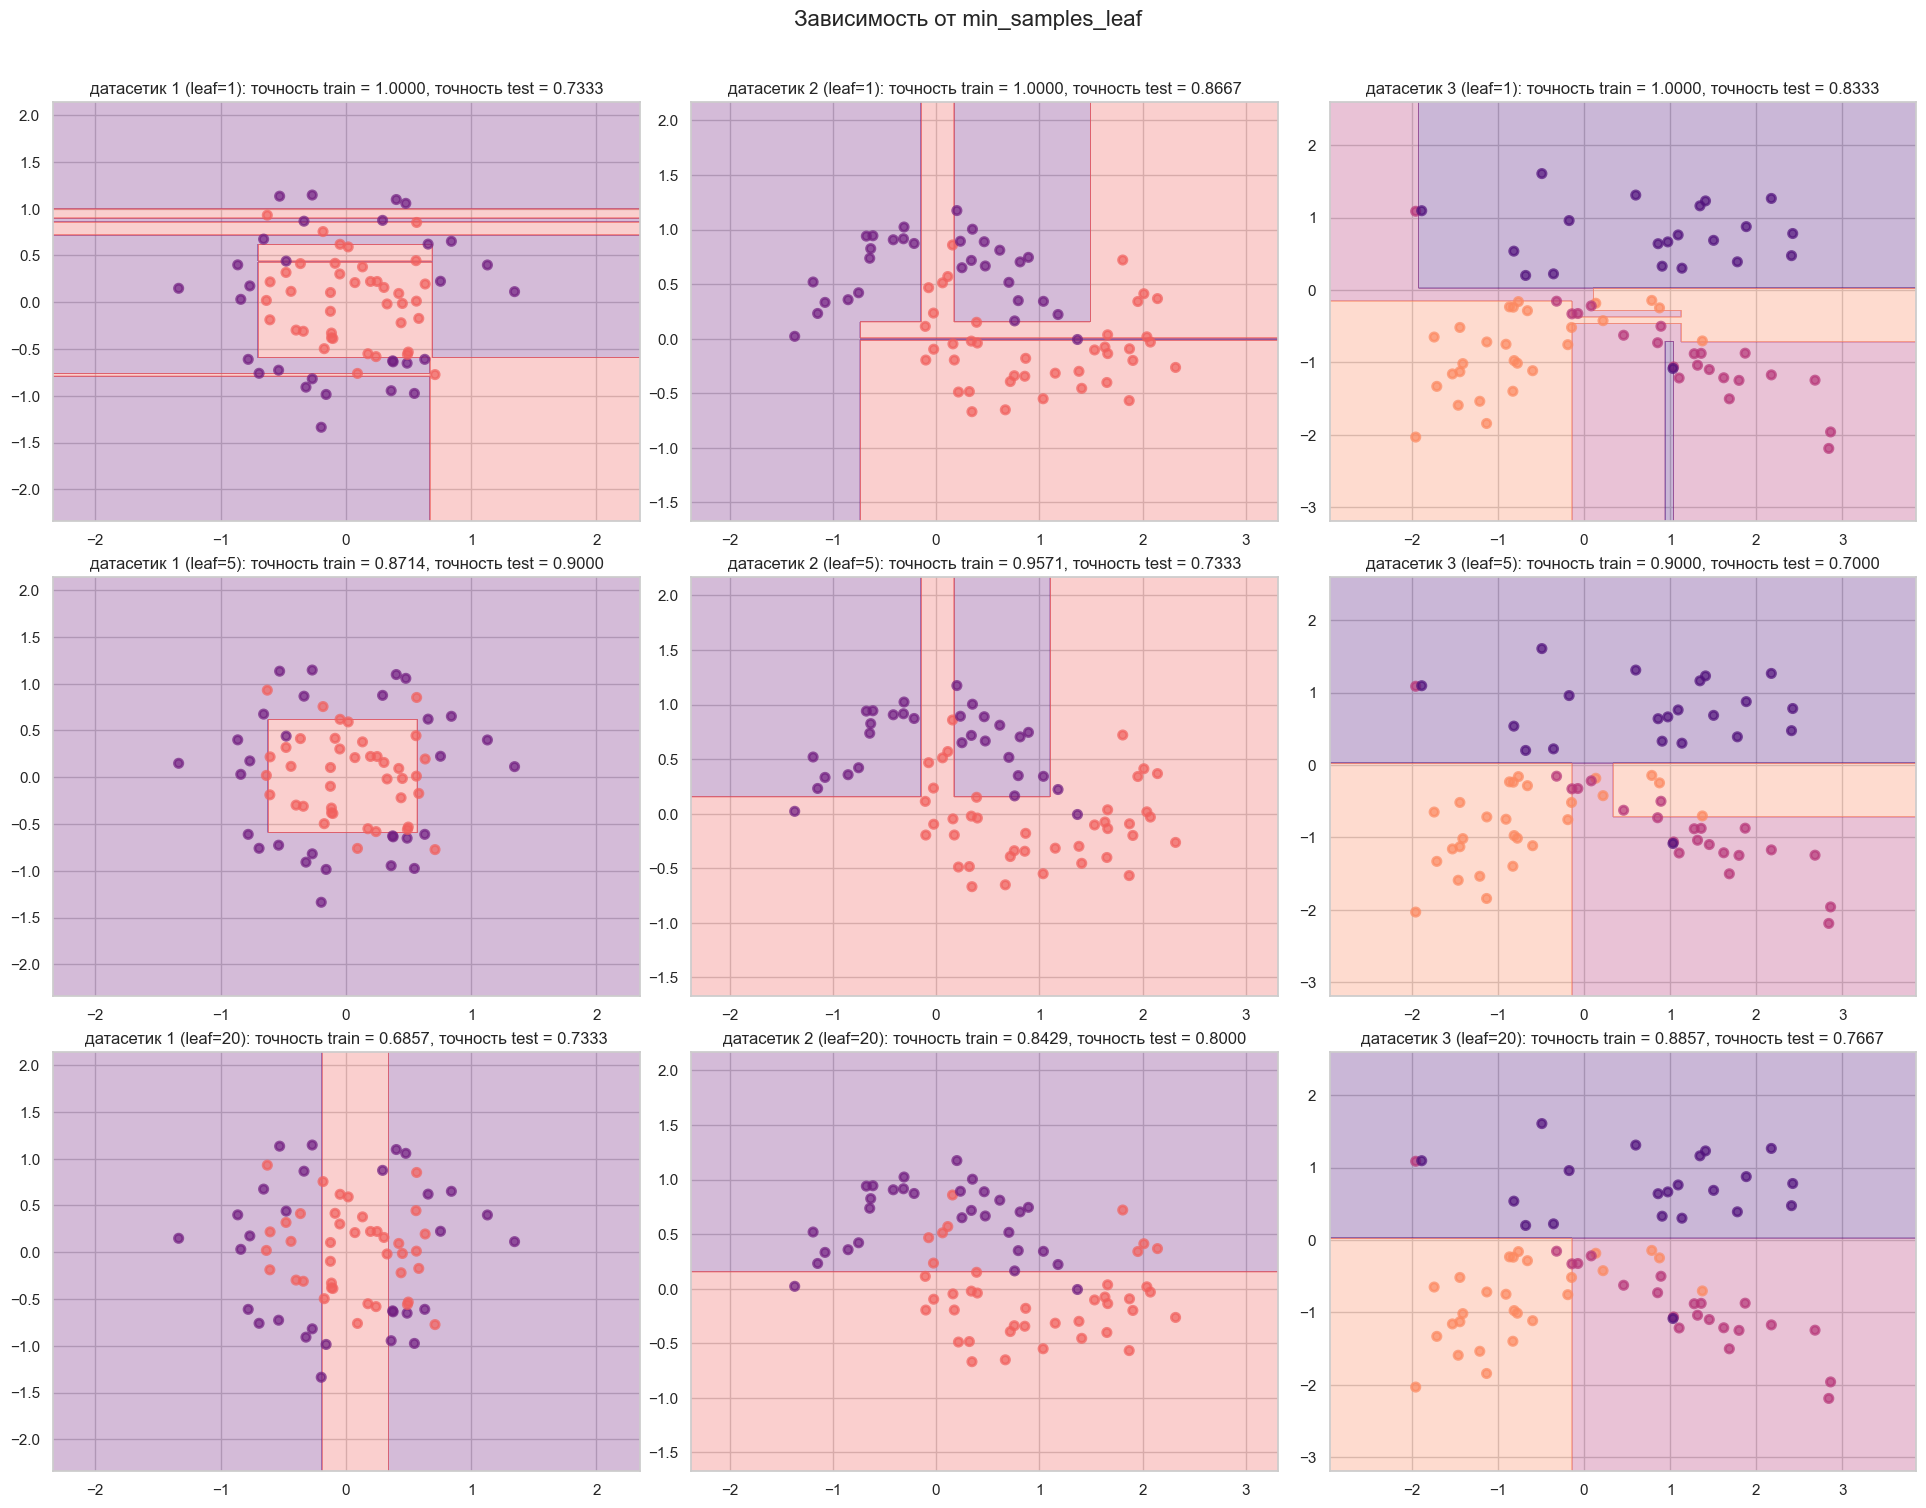

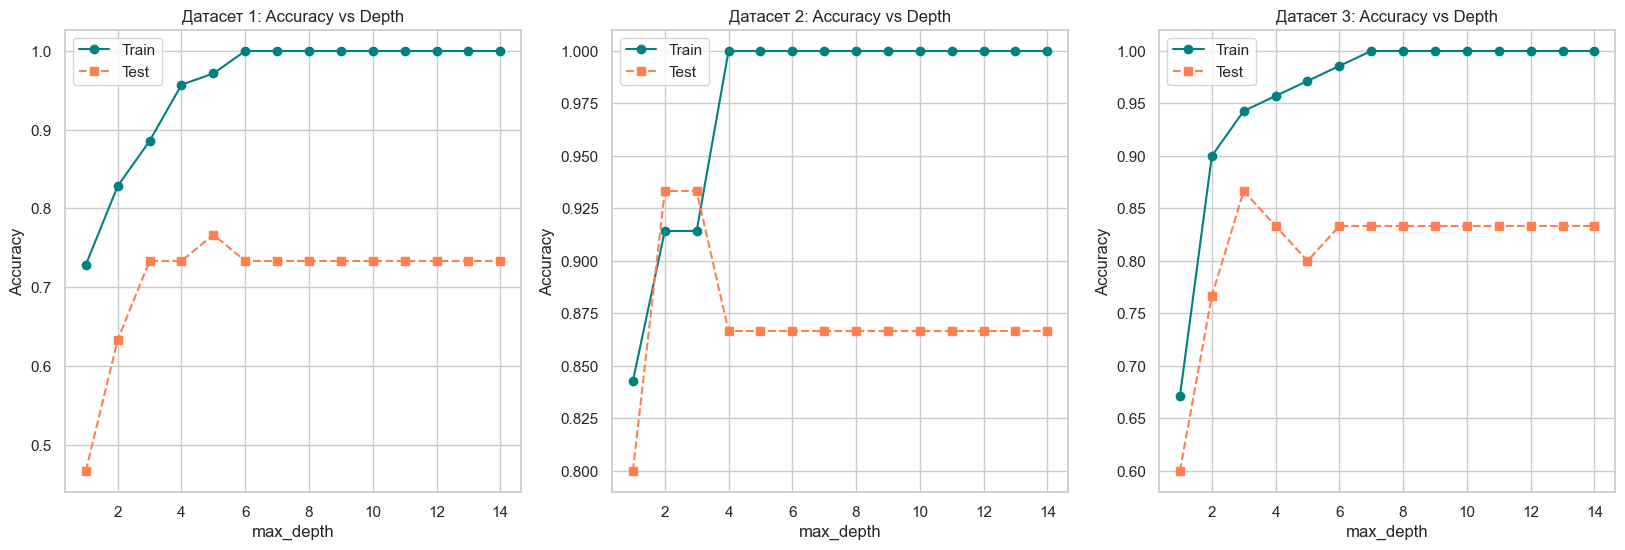

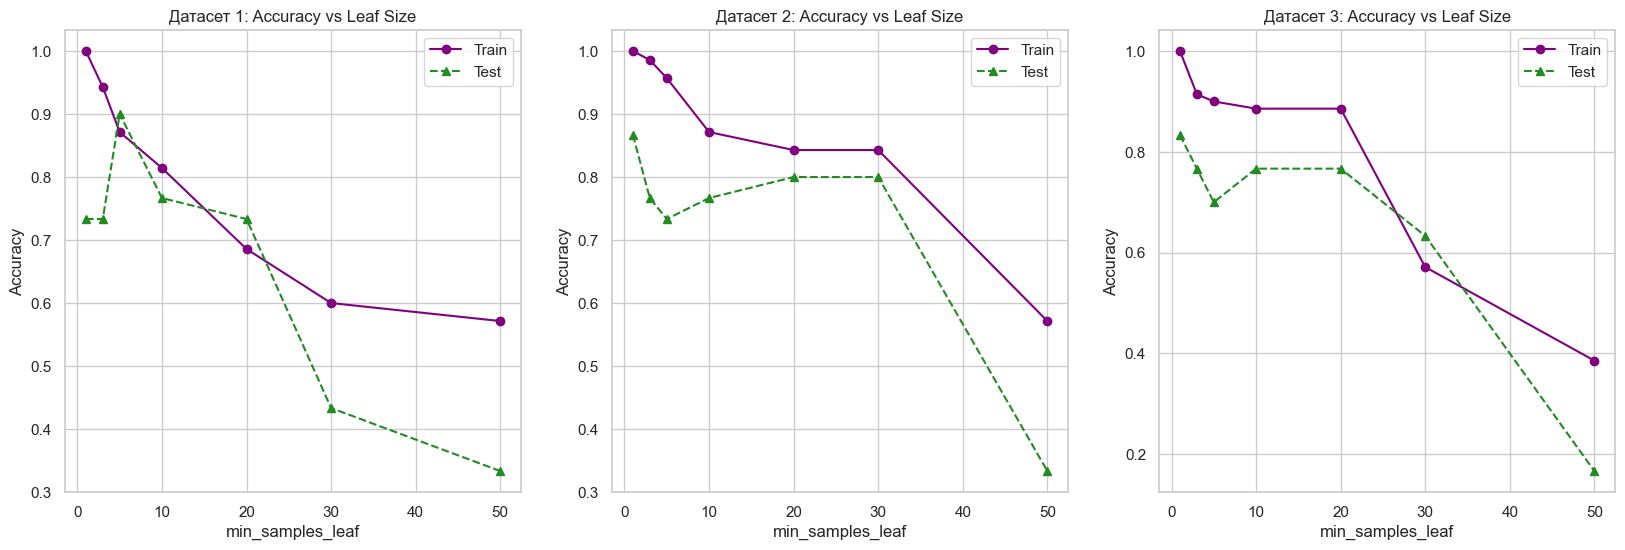

In [64]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import numpy as np

def plot_surface(clf, X, y):
    step = 0.01
    n_cls = len(np.unique(y))
    pal = sns.color_palette("magma", n_colors=n_cls)
    cmap = ListedColormap(pal)
    
    x_min = X[:, 0].min() - 1
    x_max = X[:, 0].max() + 1
    y_min = X[:, 1].min() - 1
    y_max = X[:, 1].max() + 1
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, step),
                         np.arange(y_min, y_max, step))
    
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)
    plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)
    
    pt_colors = np.array(pal)[y]
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=0.7,
                edgecolors=pt_colors, linewidths=2)

# changing max_depth 

d_params = [1, 3, 5, None] 
n_rows = len(d_params)
n_cols = len(datasets)

plt.figure(figsize=(20, 5 * n_rows))
idx = 1

for i in range(n_rows):
    d = d_params[i]
    for j in range(n_cols):
        X, y = datasets[j]
        
        X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.3, random_state=42)
        
        clf = DecisionTreeClassifier(max_depth=d, random_state=42)
        clf.fit(X_tr, y_tr)
        
        acc_tr = accuracy_score(y_tr, clf.predict(X_tr))
        acc_te = accuracy_score(y_te, clf.predict(X_te))
        
        plt.subplot(n_rows, n_cols, idx)
        plot_surface(clf, X_tr, y_tr)
        
        d_s = str(d) if d is not None else "None"
        title = f"датасетик {j+1} (depth={d_s}): точность train = {acc_tr:.4f}, точность test = {acc_te:.4f}"
        plt.title(title)
        print(title)
        idx += 1

plt.suptitle("Зависимость от max_depth", fontsize=16, y=1.02)
plt.show()

#  changing min_samples_leaf 

l_params = [1, 5, 20]
n_rows = len(l_params)

plt.figure(figsize=(20, 5 * n_rows))
idx = 1

for i in range(n_rows):
    leaf = l_params[i]
    for j in range(n_cols):
        X, y = datasets[j]
        
        X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.3, random_state=42)
        
        clf = DecisionTreeClassifier(min_samples_leaf=leaf, random_state=42)
        clf.fit(X_tr, y_tr)
        
        acc_tr = accuracy_score(y_tr, clf.predict(X_tr))
        acc_te = accuracy_score(y_te, clf.predict(X_te))
        
        plt.subplot(n_rows, n_cols, idx)
        plot_surface(clf, X_tr, y_tr)
        
        title = f"датасетик {j+1} (leaf={leaf}): точность train = {acc_tr:.4f}, точность test = {acc_te:.4f}"
        plt.title(title)
        print(title)
        
        idx += 1

plt.suptitle("Зависимость от min_samples_leaf", fontsize=16, y=1.02)
plt.show()



d_range = range(1, 15)
tr_res = [[] for _ in range(3)] 
te_res = [[] for _ in range(3)]

for i in range(len(datasets)):
    X, y = datasets[i]
    X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.3, random_state=42)
    
    for d in d_range:
        clf = DecisionTreeClassifier(max_depth=d, random_state=42)
        clf.fit(X_tr, y_tr)
        tr_res[i].append(accuracy_score(y_tr, clf.predict(X_tr)))
        te_res[i].append(accuracy_score(y_te, clf.predict(X_te)))
plt.figure(figsize=(20, 6))

for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.plot(d_range, tr_res[i], label='Train', marker='o', color='teal', linestyle='-')
    plt.plot(d_range, te_res[i], label='Test', marker='s', color='coral', linestyle='--')
    
    plt.xlabel('max_depth')
    plt.ylabel('Accuracy')
    plt.title(f'Датасет {i+1}: Accuracy vs Depth')
    plt.legend()
    plt.grid(True)
plt.show()



l_range = [1, 3, 5, 10, 20, 30, 50]
tr_res_l = [[] for _ in range(3)]
te_res_l = [[] for _ in range(3)]

for i in range(len(datasets)):
    X, y = datasets[i]
    X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.3, random_state=42)
    
    for l in l_range:
        clf = DecisionTreeClassifier(min_samples_leaf=l, random_state=42)
        clf.fit(X_tr, y_tr)
        tr_res_l[i].append(accuracy_score(y_tr, clf.predict(X_tr)))
        te_res_l[i].append(accuracy_score(y_te, clf.predict(X_te)))


plt.figure(figsize=(20, 6))

for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.plot(l_range, tr_res_l[i], label='Train', marker='o', color='purple', linestyle='-')
    plt.plot(l_range, te_res_l[i], label='Test', marker='^', color='forestgreen', linestyle='--')
    
    plt.xlabel('min_samples_leaf')
    plt.ylabel('Accuracy')
    plt.title(f'Датасет {i+1}: Accuracy vs Leaf Size')
    plt.legend()
    plt.grid(True)
plt.show()

__Ответ:__
при min_samples_leaf=1 наши деревья тупо зазубривают данные и train=1 это оверфит, на тесте всё неоч:

датасетик 1 (leaf=1): точность train = 1.0000, точность test = 0.7333
датасетик 2 (leaf=1): точность train = 1.0000, точность test = 0.8667
датасетик 3 (leaf=1): точность train = 1.0000, точность test = 0.8333

, модель хавает любой шум и рисует под него отдельные ветки

Поднимаем min_samples_leaf до 5 и на первом датасете точность взлетает до 0.9, потому что срезали лишнюю детализацию и "шумовые" островки.

датасетик 1 (leaf=5): точность train = 0.8714, точность test = 0.9000
датасетик 2 (leaf=5): точность train = 0.9571, точность test = 0.7333
датасетик 3 (leaf=5): точность train = 0.9000, точность test = 0.7000

 Но на втором и третьем датасетах 5 оказалось перебором и точность упала, модель стала слишком "тупой" и не вывезла сложные формы типа луны. А вот если выкрутить min_samples_leaf до 20 то начинается жесткий андерфит модель становится настолько примитивной, что фейлит даже на трейне
 
 
итог min_samples_leaf это рычаг регуляризации:
 мало  значит ловим переобучение,
 много значит недообучение, надо искать баланс


# 2. Решающие деревья своими руками

В этой части вам нужно реализовать свой класс для обучения решающего дерева в задаче бинарной классификации с возможностью обработки вещественных и категориальных признаков.

__Задание 3. (1.5 балл)__

Реализуйте функцию find_best_split из модуля hw2code.py

In [65]:
def find_best_split(feature_vector: np.ndarray, target_vector: np.ndarray):
    """
    Находит оптимальный порог для разбиения вектора признака по критерию Джини.
    """
    # sort index 
    idx = np.argsort(feature_vector)
    f_sorted = feature_vector[idx]
    t_sorted = target_vector[idx]
    
    
    unique_feats, unique_idx = np.unique(f_sorted, return_index=True)
    
    if len(unique_feats) < 2:
        return np.array([]), np.array([]), None, None
    
    thresholds = (unique_feats[:-1] + unique_feats[1:]) / 2.0
    
    n = len(target_vector)
    n1_total = np.sum(t_sorted == 1)
    
    split_idx = unique_idx[1:]
    
    cumulative_sum = np.cumsum(t_sorted == 1)
    n1_l = cumulative_sum[split_idx - 1]
    
    n_l = split_idx
    n_r = n - n_l
    
    n1_r = n1_total - n1_l
    n0_l = n_l - n1_l
    n0_r = n_r - n1_r
    
    gini_l = 1.0 - (n1_l / n_l)**2 - (n0_l / n_l)**2
    gini_r = 1.0 - (n1_r / n_r)**2 - (n0_r / n_r)**2
    
    ginis = - (n_l / n) * gini_l - (n_r / n) * gini_r
    
    best_i = np.argmax(ginis)
    
    return thresholds, ginis, thresholds[best_i], ginis[best_i]


__Задание 4. (0.5 балла)__

Загрузите таблицу students.csv (это немного преобразованный датасет [User Knowledge](https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling)). В ней признаки объекта записаны в первых пяти столбцах, а в последнем записана целевая переменная (класс: 0 или 1). Постройте на одном изображении пять кривых "порог — значение критерия Джини" для всех пяти признаков. Отдельно визуализируйте scatter-графики "значение признака — класс" для всех пяти признаков.

In [66]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ


__Задание 5. (0.5 балла)__

Исходя из кривых значений критерия Джини, по какому признаку нужно производить деление выборки на два поддерева? Согласуется ли этот результат с визуальной оценкой scatter-графиков? Как бы охарактеризовали вид кривой для "хороших" признаков, по которым выборка делится почти идеально? Чем отличаются кривые для признаков, по которым деление практически невозможно?

**Ответ:**

__Задание 6. (1.5 балла).__

Разберитесь с уже написанным кодом в классе DecisionTree модуля hw2code.py. Найдите ошибки в реализации метода \_fit_node. Напишите функцию \_predict_node.

 Построение дерева осуществляется согласно базовому жадному алгоритму, предложенному в лекции. Выбор лучшего разбиения необходимо производить по критерию Джини. Критерий останова: все объекты в листе относятся к одному классу или ни по одному признаку нельзя разбить выборку. Ответ в листе: наиболее часто встречающийся класс в листе. Для категориальных признаков выполняется преобразование, описанное в лекции в разделе «Учет категориальных признаков».

__Задание 7. (0.5 балла)__

Протестируйте свое решающее дерево на датасете [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom). Вам нужно скачать таблицу agaricus-lepiota.data (лежит на гитхабе вместе с заданием), прочитать ее с помощью pandas, применить к каждому столбцу LabelEncoder (из sklearn), чтобы преобразовать строковые имена категорий в натуральные числа. Первый столбец — это целевая переменная (e — edible, p — poisonous) Мы будем измерять качество с помощью accuracy, так что нам не очень важно, что будет классом 1, а что — классом 0. Обучите решающее дерево на половине случайно выбранных объектов (признаки в датасете категориальные) и сделайте предсказания для оставшейся половины. Вычислите accuracy.

У вас должно получиться значение accuracy, равное единице (или очень близкое к единице), и не очень глубокое дерево.

In [67]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ


__Задание 8. (бонус, 1 балл)__

Реализуйте в классе DecisionTree поддержку параметров max_depth, min_samples_split и min_samples_leaf по аналогии с DecisionTreeClassifier. Постройте графики зависимости качества предсказания в зависимости от этих параметров для набора данных tic-tac-toe (см. следующий пункт).

__Задание 9. (2 балла)__

Загрузите следующие наборы данных (напомним, что pandas умеет загружать файлы по url, в нашем случае это файл \*.data), предварительно ознакомившись с описанием признаков и целевой переменной в каждом из них (она записаны в Data Folder, в файле *.names): 
* [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom) (загрузили в предыдущем пункте, классы записаны в нулевом столбце)
* [tic-tac-toe](https://archive.ics.uci.edu/ml/datasets/Tic-Tac-Toe+Endgame) (классы записаны в последнем столбце, датасет лежит на гитхабе вместе с заданием)
* [cars](https://archive.ics.uci.edu/ml/datasets/Car+Evaluation) (классы записаны в последнем столбце, считаем что unacc, acc — это класс 0, good, vgood — класс 1)
* [nursery](https://archive.ics.uci.edu/ml/datasets/Nursery) (классы записаны в последнем столбце, считаем, что not_recom и recommend — класс 0, very_recom, priority, spec_prior — класс 1).

Закодируйте категориальные признаки, использовав LabelEncoder. С помощью cross_val_score (cv=10) оцените accuracy на каждом из этих наборов данных следующих алгоритмов:
* DecisionTree, считающий все признаки вещественными
* DecisionTree, считающий все признаки категориальными
* DecisionTree, считающий все признаки вещественными + one-hot-encoding всех признаков
* DecisionTreeClassifier из sklearn. Запишите результат в pd.DataFrame (по строкам — наборы данных, по столбцам — алгоритмы).

Рекомендации:
* Чтобы cross_val_score вычисляла точность, нужно передать scoring=make_scorer(accuracy_score), обе фукнции из sklearn.metrics.
* Если вам позволяет память (а она скорее всего позволяет), указывайте параметр sparse=False в OneHotEncoder (если вы, конечно, используете его). Иначе вам придется добиваться того, чтобы ваша реализация дерева умела работать с разреженными матрицами (что тоже, в целом, не очень сложно).

In [68]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
    

__Задание 10. (1 балла)__

Проанализируйте результаты эксперимента. 
Одинаково ли для разных наборов данных ранжируются алгоритмы? 
Порассуждайте, почему так происходит. 

Обратите внимание на значение признаков в разных наборах данных. 
Присутствует ли в результатах какая-то компонента случайности? 
Можно ли повлиять на нее и улушить работу алгоритмов?

**Ответ:**

Вставьте что угодно, описывающее ваши впечатления от этого задания: